# Auxiliar 9 - Visualización científica y diferencias finitas

**Profesor: Daniel Calderón** \
**Auxiliares: Sebastián Olmos y Nelson Marambio** \
**Fecha: 11/06/2021**

## P1:

El potencial gravitatorio V generado por una esfera de masa m está dado por:

$$V(r) = -\frac{Gm}{r}[\frac{J}{Kg}]$$

* Donde G es la constante de gravitación universal $G=6.67\ \bullet{10}^{-11}\frac{Nm^2}{kg^2}$
* r la distancia entre el centro de la esfera generadora del campo y la posición donde se mide el potencial.
* Esta ecuación solo se cumple cuando r>R, con R el radio de la esfera.
* Efectivamente, V es un campo escalar.
* Se cumple el principio de superposición, esto es, si varios cuerpos se encuentran en el mismo espacio, el potencial gravitatorio total es igual a la suma de todos los potenciales generados.

Queremos estudiar el caso de un potencial bajo la presencia de un astro principal y otros dos astros menores, como es el caso del planeta Marte y sus satélites naturales Fobos y Deimos. Cada cuerpo celeste genera un campo V(x,y,z) en todo el espacio, para analizarlos generamos visualizaciones en 3D, Procederemos como sigue.


1.    Genere una discretización regular en 3D para un espacio que encapsule al planeta Marte y sus satélites Deimos y Phobos. Para cada punto de este espacio calcule el potencial gravitatorio total. Almacene su resultado en una matriz cúbica. Utilice dimensiones proporcionales a las reales, pero que permitan trabajar en un rango numérico apropiado. Para posiciones en el interior de los cuerpos estelares, simplemente asigne el valor cero. Almacene esta matriz cúbica con numpy.save para su posterior uso y visualización. Posteriormente puede leer esta información con numpy.load. No utilice más de 100 valores por componente.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


CONST_G = 0.06 #6.67 * 1e-11

class Body:
    """Class representing a body"""

    def __init__(self, name, position, mass, radius):
        self.name = name
        self.position = position
        self.mass = mass
        self.radius = radius

    def get_mass(self):
        return self.mass
    
    def get_pos(self):
        return self.position

    def get_radius(self):
        return self.radius


# Generating bodies
mars = Body(name='mars', position=(0., 0., 0.), 
                mass=100.0, radius=0.4)
deimos = Body(name='deimos', position=(1.5, 1.5, 1.5), 
                mass=20.0, radius=0.2)

phobos = Body(name='phobos', position=(-1.2, -1.2, -1.2), 
                mass=15.0, radius=0.15)



def V(X, Y, Z, body):
    """Given a point x, y, z, calculates gravitatonial potential."""
    m = body.get_mass()
    xb, yb, zb = body.get_pos()

    potential = np.zeros(shape=X.shape)
    
    # x = X[i] si es que se va al ciclo for.
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            for k in range(X.shape[2]):
                x, y, z = X[i, j, k], Y[i, j, k], Z[i, j, k]
                euc_distance = np.sqrt((x-xb)**2 + (y-yb)**2 + (z-zb)**2)

                if euc_distance <= body.radius*1.1:
                    potential[i, j, k] = 0 # centro de un planeta
                else:
                    potential[i, j, k] = -1 * CONST_G * m / euc_distance

    return potential

X, Y, Z = np.mgrid[-2:2:20j, -2:2:20j, -2:2:20j]
#print(X[0, 2, 4], Y[0, 2, 4], Z[0, 2, 4])
# Considerar: utilizar linspace endpoint=True

# Compute potential for both bodies
V_mars = V(X, Y, Z, mars)
V_deimos = V(X, Y, Z, deimos)
V_phobos = V(X, Y, Z, phobos)

# Sum it to have the total effect.
V_total = V_mars + V_deimos + V_phobos


# Storing our results
np.save('Potentials_mars', V_mars)
np.save('Potentials_deimos', V_deimos)
np.save('Potentials_phobos', V_phobos)
np.save('Potentials', V_total)


###  Veamos este campo en 3D:
#### Solo Marte:

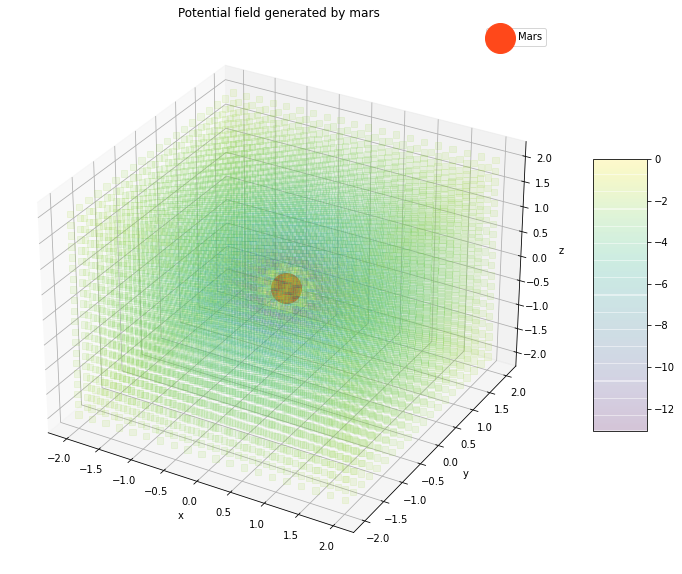

In [2]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (15, 10))

# Mars in place
ax.scatter(mars.get_pos()[0], mars.get_pos()[1], mars.get_pos()[2], color=(1, 0.282, 0.101), s=900, label="Mars")
# Gravitational potential field
scat = ax.scatter(X, Y, Z, c=V_mars, alpha=0.12, s=40, marker='s', cmap='viridis')

fig.colorbar(scat, shrink=0.5, aspect=5) # This is the colorbar at the side

# Showing the result
ax.set_title('Potential field generated by mars')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

plt.show()

#### Solo Deimos

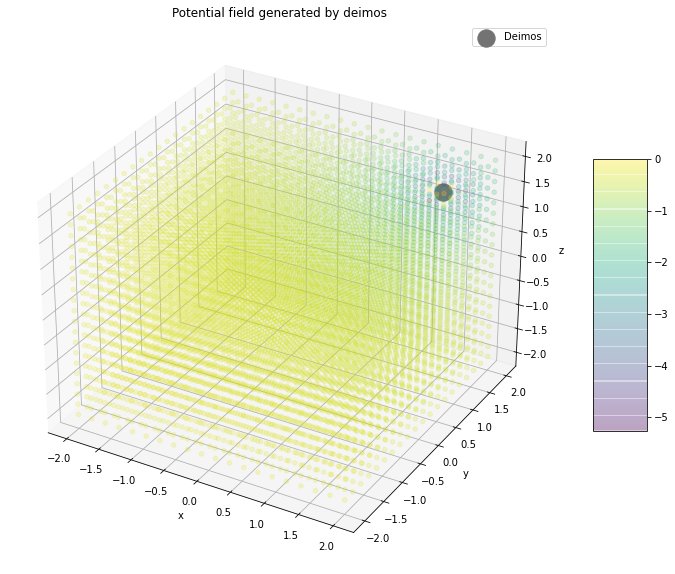

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (15, 10))

# Deimos in place
ax.scatter(deimos.get_pos()[0], deimos.get_pos()[1], deimos.get_pos()[2], color=(0.45, 0.45, 0.45), s=300, label="Deimos")
# Gravitational potential field
scat = ax.scatter(X, Y, Z, c=V_deimos, alpha=0.2)

fig.colorbar(scat, shrink=0.5, aspect=5) # This is the colorbar at the side

# Showing the result
ax.set_title('Potential field generated by deimos')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

plt.show()

#### Solo Phobos

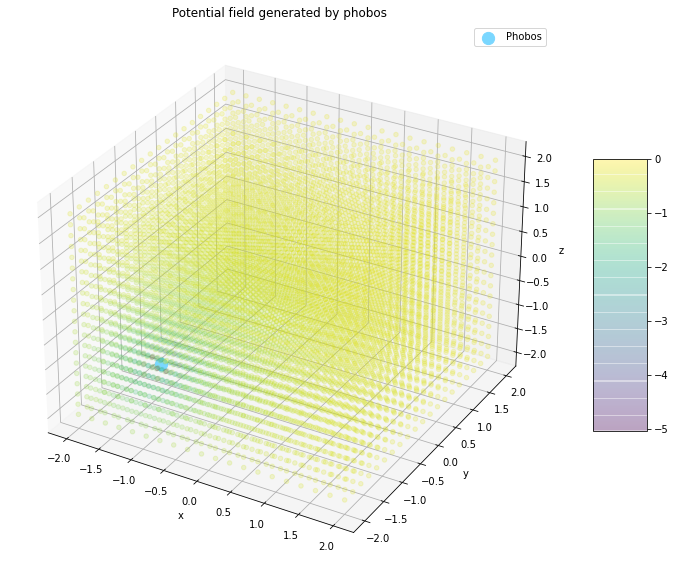

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (15, 10))
# Phobos in place
ax.scatter(phobos.get_pos()[0], phobos.get_pos()[1], phobos.get_pos()[2], color=(0.478, 0.843, 1), s=150, label="Phobos")
# Gravitational potential field
scat = ax.scatter(X, Y, Z, c=V_phobos, alpha=0.2)

fig.colorbar(scat, shrink=0.5, aspect=5) # This is the colorbar at the side

# Showing the result
ax.set_title('Potential field generated by phobos')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

plt.show()

#### Marte, Phobos y Deimos

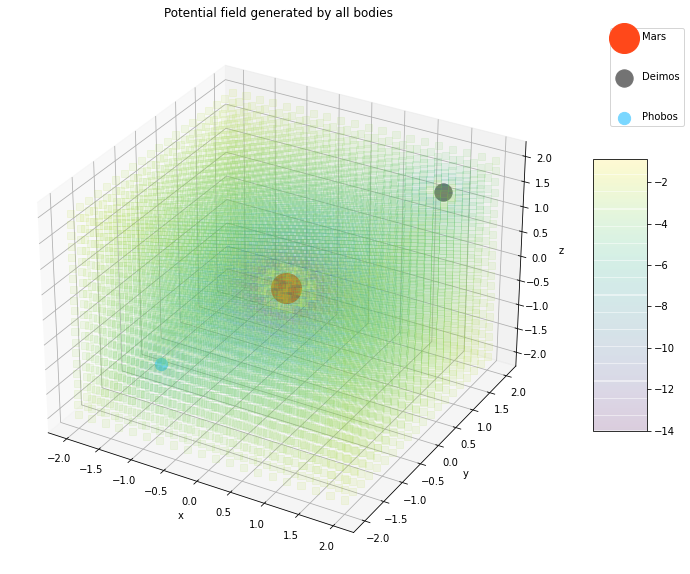

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (15, 10))

# Mars in place
ax.scatter(mars.get_pos()[0], mars.get_pos()[1], mars.get_pos()[2], color=(1, 0.282, 0.101), s=900, label="Mars")

# Deimos in place
ax.scatter(deimos.get_pos()[0], deimos.get_pos()[1], deimos.get_pos()[2], color=(0.45, 0.45, 0.45), s=300, label="Deimos")

# Phobos in place
ax.scatter(phobos.get_pos()[0], phobos.get_pos()[1], phobos.get_pos()[2], color=(0.478, 0.843, 1), s=150, label="Phobos")

# Gravitational potential field
scat = ax.scatter(X, Y, Z, c=V_total, alpha=0.10, s=50, marker='s', cmap='viridis')

fig.colorbar(scat, shrink=0.5, aspect=5) # This is the colorbar at the side

# Showing the result
ax.set_title('Potential field generated by all bodies')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1), labelspacing = 3.0)

plt.show()

#### Se puede apreciar mejor el campo escalar visualizando iso-superficies, lo cual requiere de una librería externa llamada ``plotly`` , por lo que este gráfico es opcional.

Si desea instalarlo, ejecute:

    pip install plotly

Documentación iso-surface plotly: https://plotly.com/python/3d-isosurface-plots/

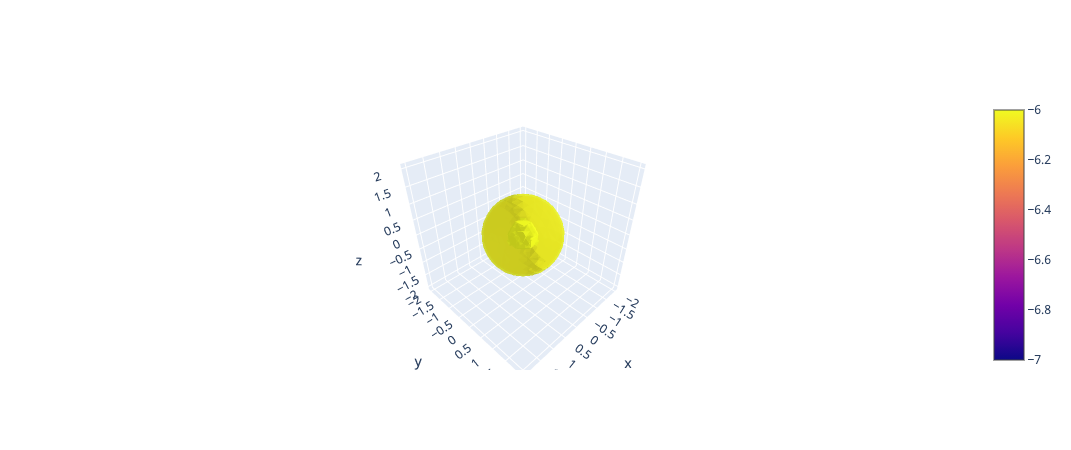

In [6]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Isosurface(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=V_total.flatten(),
    opacity=0.7,
    isomin=-7,
    isomax=-6,
    surface_count=5, # number of isosurfaces, 2 by default: only min and max
    caps=dict(x_show=False, y_show=False)
    ))
fig.show()

2. Genere 3 vistas de cortes transversales sobre el cubo de información generado y presentelos como imágenes utilizando imshow de matplotlib. Rotule correctamente los ejes de su visualización y presente la escala de colores. Escoja una escala de colores apropiada desde: <br>
https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

### Viendo un solo cuerpo desde el eje Z

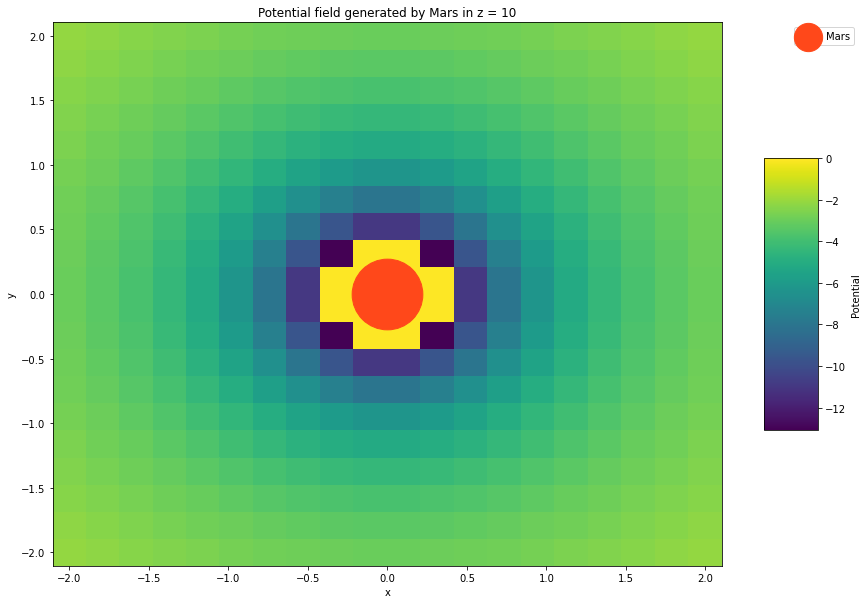

In [7]:
from matplotlib import cm

fig, ax = plt.subplots(figsize = (15, 10))

XX, YY = np.mgrid[-2:2:20j, -2:2:20j]

pcm = ax.pcolor(XX, YY, V_mars[:, :, 10], cmap='viridis', shading='auto')
ax.scatter(mars.get_pos()[1], mars.get_pos()[2], alpha=1.0,color=(1, 0.282, 0.101), s=50e2, label='Mars')

#  después puede ser contour para agregarse.
fig.colorbar(pcm, shrink=0.5, aspect=5, label="Potential") # This is the colorbar at the side

# Showing the result
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Potential field generated by Mars in z = 10')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1), markerscale = 0.4, labelspacing = 3.0)

plt.show()

### Viendo los astros desde el eje z

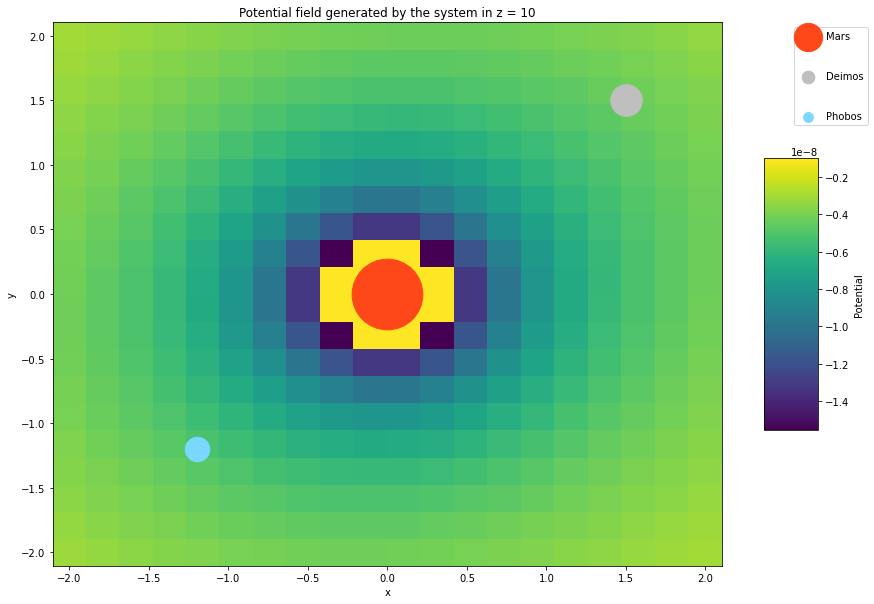

In [8]:
from matplotlib import cm

fig, ax = plt.subplots(figsize = (15, 10))

XX, YY = np.mgrid[-2:2:20j, -2:2:20j]

pcm = ax.pcolor(XX, YY, V_total[:, :, 10], cmap='viridis', shading='auto')
# Mars in place
ax.scatter(mars.get_pos()[1], mars.get_pos()[2], alpha=1.0,color=(1, 0.282, 0.101), s=50e2, label='Mars')
# Deimos in place
ax.scatter(deimos.get_pos()[1], deimos.get_pos()[2], alpha=1.0, s=10e2,  color=(0.75,0.75,0.75), label='Deimos')
# Mars in place
ax.scatter(phobos.get_pos()[1], phobos.get_pos()[2], alpha=1.0, s=6e2,  color=(0.478, 0.843, 1), label='Phobos')

#  después puede ser contour para agregarse.
fig.colorbar(pcm, shrink=0.5, aspect=5, label="Potential") # This is the colorbar at the side

# Showing the result
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Potential field generated by the system in z = 10')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1), markerscale = 0.4, labelspacing = 3.0)

plt.show()

### Viendo los astros desde el eje y

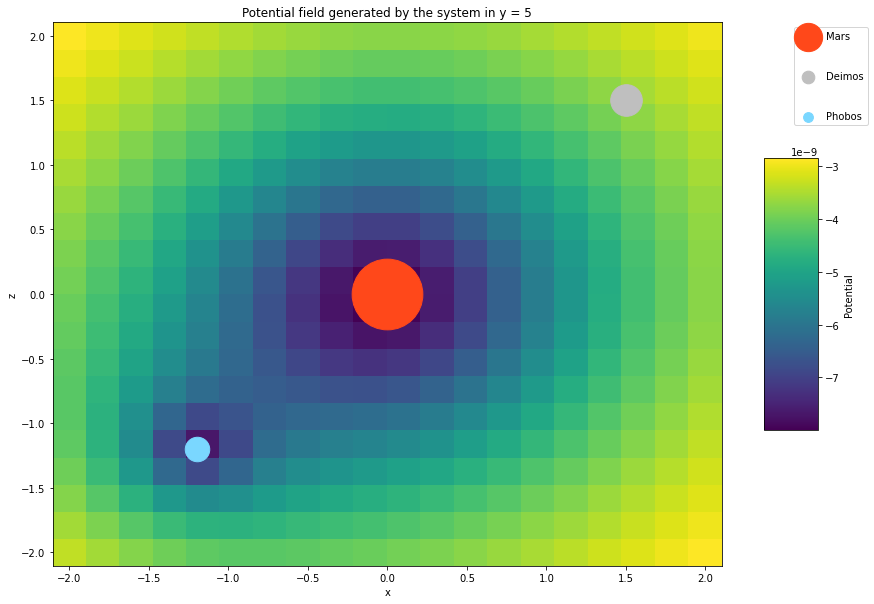

In [9]:
from matplotlib import cm

fig, ax = plt.subplots(figsize = (15, 10))

XX, ZZ = np.mgrid[-2:2:20j, -2:2:20j]

pcm = ax.pcolor(XX, ZZ, V_total[:, 5, :], cmap='viridis', shading='auto')
# Mars in place
ax.scatter(mars.get_pos()[1], mars.get_pos()[2], alpha=1.0,color=(1, 0.282, 0.101), s=50e2, label='Mars')
# Deimos in place
ax.scatter(deimos.get_pos()[1], deimos.get_pos()[2], alpha=1.0, s=10e2,  color=(0.75,0.75,0.75), label='Deimos')
# Mars in place
ax.scatter(phobos.get_pos()[1], phobos.get_pos()[2], alpha=1.0, s=6e2,  color=(0.478, 0.843, 1), label='Phobos')

#  después puede ser contour para agregarse.
fig.colorbar(pcm, shrink=0.5, aspect=5, label="Potential") # This is the colorbar at the side

# Showing the result
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_title('Potential field generated by the system in y = 5')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1), markerscale = 0.4, labelspacing = 3.0)

plt.show()

### Viendo los astros desde el eje x

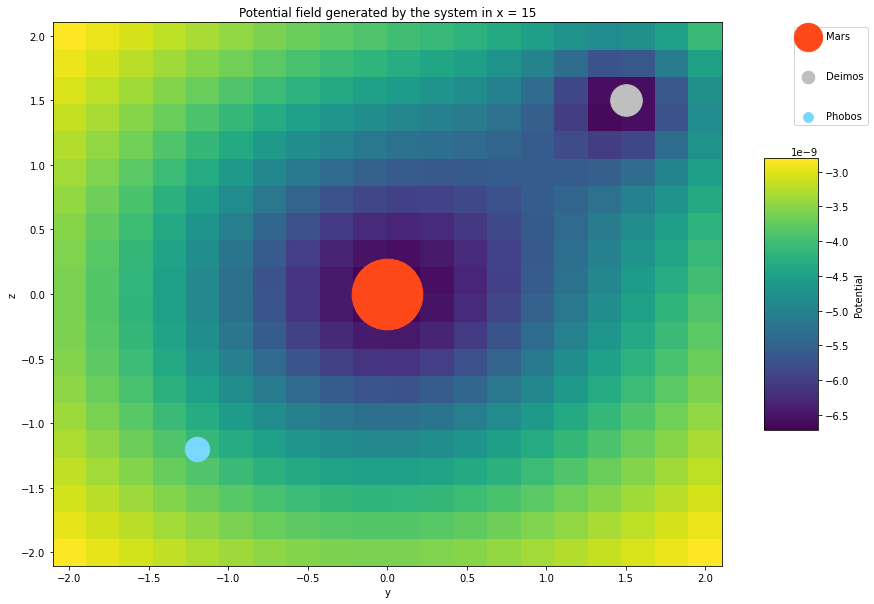

In [10]:
from matplotlib import cm

fig, ax = plt.subplots(figsize = (15, 10))

YY, ZZ = np.mgrid[-2:2:20j, -2:2:20j]

pcm = ax.pcolor(YY, ZZ, V_total[15, :, :], cmap='viridis', shading='auto')
# Mars in place
ax.scatter(mars.get_pos()[1], mars.get_pos()[2], alpha=1.0,color=(1, 0.282, 0.101), s=50e2, label='Mars')
# Deimos in place
ax.scatter(deimos.get_pos()[1], deimos.get_pos()[2], alpha=1.0, s=10e2,  color=(0.75,0.75,0.75), label='Deimos')
# Mars in place
ax.scatter(phobos.get_pos()[1], phobos.get_pos()[2], alpha=1.0, s=6e2,  color=(0.478, 0.843, 1), label='Phobos')

#  después puede ser contour para agregarse.
fig.colorbar(pcm, shrink=0.5, aspect=5, label="Potential") # This is the colorbar at the side

# Showing the result
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_title('Potential field generated by the system in x = 15')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1), markerscale = 0.4, labelspacing = 3.0)

plt.show()

## P2

1.	Considere su implementación para la parte I.1. Genere valores y almacene para una región cercana al planeta Marte. Esta vez, considere una discretización cuadrada en un espacio 2D. Y una grilla de no más de 50x50 valores.



In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

CONST_G = 0.06  # 6.67 e-11

class Body2D:
    """Class representing a body"""

    def __init__(self, name, position, mass, radius):
        self.name = name
        self.position = position
        self.mass = mass
        self.radius = radius

    def get_mass(self):
        return self.mass
    
    def get_pos(self):
        return self.position

    def get_radius(self):
        return self.radius

mars = Body(name='mars', position=(0., 0.), 
                mass=100.0, radius=0.5)
deimos = Body(name='deimos', position=(1.5, 1.5), 
                mass=20.0, radius=0.2)

phobos = Body(name='phobos', position=(-1.2, -1.2), 
                mass=15.0, radius=0.15)


def V(X, Y, body):
    """Given a point x, y, calculate gravitatonial potential."""
    m = body.get_mass()
    xb, yb = body.get_pos()

    potential = np.zeros(shape=X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x, y = X[i, j], Y[i, j]
            euc_distance = np.sqrt((x-xb)**2 + (y-yb)**2)

            if euc_distance <= body.radius*1.1:
                potential[i, j] = 0
            else:
                potential[i, j] = -1 * CONST_G * m / euc_distance

    return potential

###  1. Grilla de no más de 50x50 valores.
Genere una mayor cantidad de valores para la region alrededor de Marte. Esta vez, considere una discretización cuadrada en un espacio 2D. Y una grilla de no más de 50x50 valores.


In [12]:
# Parte 1
X, Y = np.mgrid[-2:2:50j , -2:2:50j]


# Compute potential
pot_mars = V(X, Y, mars)
pot_deimos = V(X, Y, deimos)
pot_phobos = V(X, Y, phobos)
total_pot = pot_mars + pot_deimos + pot_phobos

### 2.	A partir de esta información.

Calcule el gradiente del potencial gravitacional utilizando una aproximación de primer orden de diferencias finitas en cada componente x e y. Esto es:

$$
\nabla V=\left[\begin{matrix}D_xV\\\\D_yV\\\end{matrix}\right]=\left[\begin{matrix}\frac{V_{i+1,j}-V_{i-1,j}}{2h_x}\\\\\frac{V_{i,j+1}-V_{i,j-1}}{2h_y}\\\end{matrix}\right]
$$

NOTA: Esta es una aproximación centrada para un [i,j] considera [i+1, j] y [i-1, j] en el eje x <br>
[i,j] considera [i, j+1] y [i, j-1]  en el eje y.

In [13]:
# central_grad[i, j] = ( V[i+1, j] - V[i-1, j] ) / 2 hx , (V[i, j+1] - V[i, j-1] ) / 2 hy
# Now we want to calculate a gradient using the forward derivative method.
def calculate_gradient_centralized(V, hx=0.5, hy=0.5):
    dx = np.zeros(shape=V.shape)
    dy = np.zeros(shape=V.shape)
    for i in range(1, V.shape[0]-1):
        for j in range(1, V.shape[1]-1):
            # Filtering results where potetial is zero, so we have a better result
            if V[i, j] and V[i+1, j] and V[i+1, j+1] and V[i, j+1] and V[i-1, j+1] and V[i-1, j] and V[i-1, j-1] and V[i, j-1] and V[i+1, j-1] :
                dx[i, j] = V[i+1, j] - V[i-1, j]
                dy[i, j] = V[i, j+1] - V[i, j-1]

    # Explodes in points where the other part is zero
    dx = dx / (2*hx)
    dy = dy / (2*hy)

    return dx, dy


# Compute gradients
dx_mars, dy_mars = calculate_gradient_centralized(pot_mars)
dx_deimos, dy_deimos = calculate_gradient_centralized(pot_deimos)
dx_phobos, dy_phobos = calculate_gradient_centralized(pot_phobos)

dx_total = dx_mars + dx_deimos + dx_phobos
dy_total = dy_mars + dy_deimos + dy_phobos

# We still have to change some values to 0, where is inside of a body
dx_total[np.where(dx_mars == 0)] = 0
dy_total[np.where(dy_mars == 0)] = 0

dx_total[np.where(dx_deimos == 0)] = 0
dy_total[np.where(dy_deimos == 0)] = 0

dx_total[np.where(dx_phobos == 0)] = 0
dy_total[np.where(dy_phobos == 0)] = 0

# Store arrays
np.save('pt2_pot_mars', pot_mars)
np.save('pt2_pot_mars_dx', dx_mars)
np.save('pt2_pot_mars_dy', dy_mars)

np.save('pt2_pot_deimos', pot_deimos)
np.save('pt2_pot_deimos_dx', dx_deimos)
np.save('pt2_pot_deimos_dy', dy_deimos)

np.save('pt2_pot_phobos', pot_phobos)
np.save('pt2_pot_phobos_dx', dx_phobos)
np.save('pt2_pot_phobos_dy', dy_phobos)


### Visualizando Marte

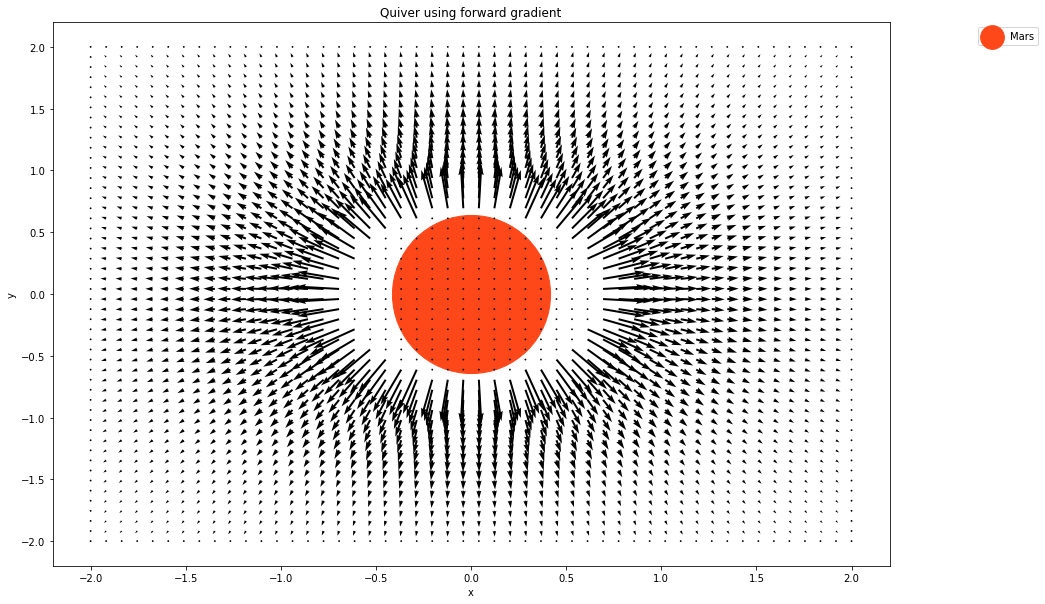

In [14]:
"""Pt.3 Plotting results with quiver mars"""
fig, ax = plt.subplots(figsize = (15, 10))
# Show mars
mars_visualization = ax.scatter(mars.get_pos()[0], mars.get_pos()[1], color=(1, 0.282, 0.101), s=mars.get_radius()*5e4, label="Mars")
# Show quiver
Q = ax.quiver(X, Y, dx_mars, dy_mars)

ax.set_title('Vector field generated by Mars')
ax.set_title('Quiver using forward gradient')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1), markerscale = 0.15)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()



### Visualizando los astros

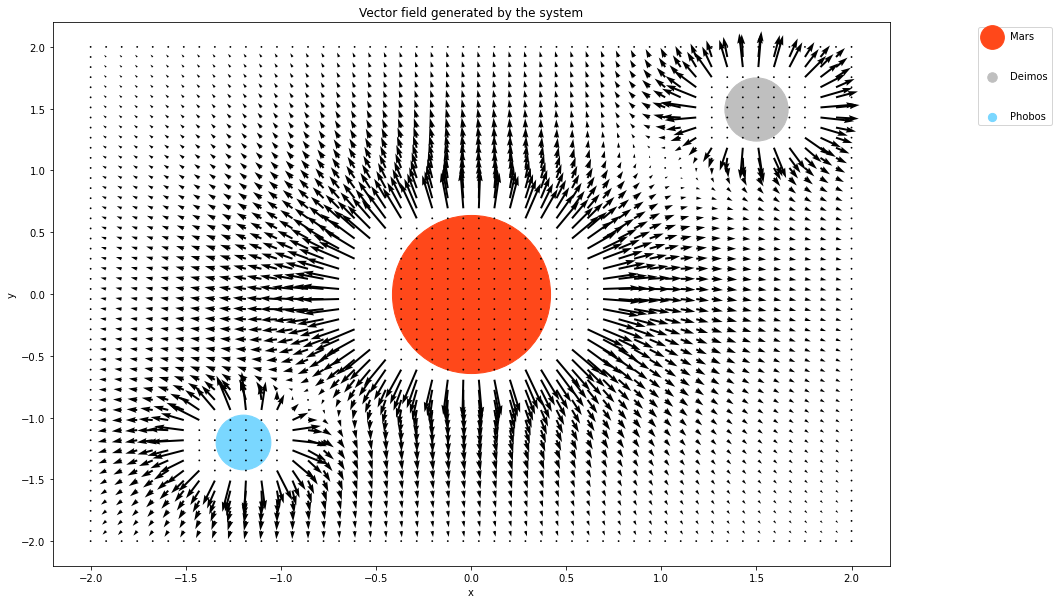

In [15]:
"""Pt.3 Plotting results with quiver moon"""
fig, ax = plt.subplots(figsize = (15, 10))
# Show both moon and sun
mars_visualization = ax.scatter(mars.get_pos()[0], mars.get_pos()[1], color=(1, 0.282, 0.101), s=mars.get_radius()*5e4, label="Mars")
deimos_visualization = ax.scatter(deimos.get_pos()[0], deimos.get_pos()[1], color=(0.75,0.75,0.75), s=deimos.get_radius()*2e4, label="Deimos")
phobos_visualization = ax.scatter(phobos.get_pos()[0], phobos.get_pos()[1], color=(0.478, 0.843, 1), s=phobos.get_radius()*2e4, label="Phobos")

# Show quiver
Q = ax.quiver(X, Y, dx_total, dy_total)

ax.set_title('Vector field generated by the system')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1), markerscale = 0.15, labelspacing = 3.0)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## P3

Resolver y graficar los resultados de la siguiente EDO usando los métodos vistos en clases:
 $$f(t, y) = y'(t) = v_0 - gt$$

 Donde:
 - $t es el tiempo
 - $y$ es la altura de un proyectil
 - $v_0$ es la velocidad vertical inicial
 - $t_0 = 0$ tiempo inicial
 - $y_0 = 0$ altura inicial
 - $g$ es la aceleración de gravedad
 - Asumiremos velocidad constante


## Método de Euler

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h(v_0 -gt)$


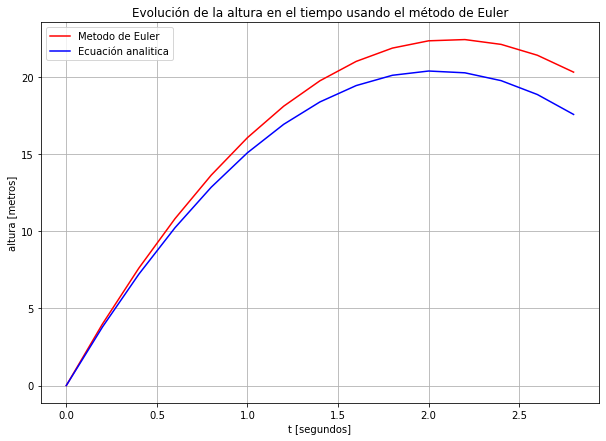

In [9]:
h = 0.2
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        y_values[i] = y_values[i - 1] + h*function(t_values[i - 1])

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo de Euler')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando el método de Euler')
ax.legend()
ax.grid()

plt.show()

## Método de Series de Taylor

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h T_2(t_i, y_i)$

Donde:

$$
T_2(t_i, y_i) = f(t_i, y_i) + \frac{1}{2!}h^2f'(t_i,y_i)
$$

$$
f'(t, y) = \frac{\partial}{\partial{t}}f(t, y) + \frac{\partial}{\partial{y}}f(t, y)\frac{\partial{y}}{\partial{t}}
$$

Por lo tanto:

$$
T_2(t_i, y_i) = (v_0 -gt_i) + \frac{1}{2!}h^2(- g + (v_0 -gt_i))
$$

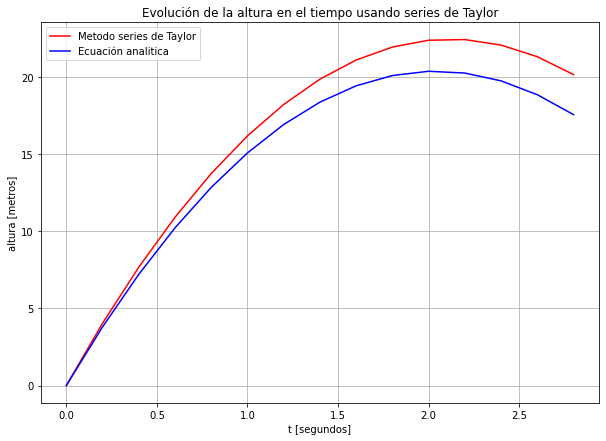

In [14]:
h = 0.2
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t + (1/2)*h*h*( -g + (v0 - g*t))

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        y_values[i] = y_values[i - 1] + h*function(t_values[i - 1])

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo series de Taylor')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando series de Taylor')
ax.legend()
ax.grid()

plt.show()

## Método de Runge Kutta 2 - Euler Modificado

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h F(t_i, y_i)$

Donde:

$$
F(t_i, y_i) = w_1f(t_i, y_i) + w_2f(t_i + ah, y_i +ahf(x_i, y_i))
$$

Como es la versión Euler modificado: $a=\frac{1}{2}$, $w_1=0$ y $w_2= 1$

Por lo tanto:

$$
F(t_i, y_i) = f(t_i + \frac{h}{2}, y_i + \frac{h}{2}f(t_i, y_i)) = v_0 -g(t_i + \frac{h}{2})
$$

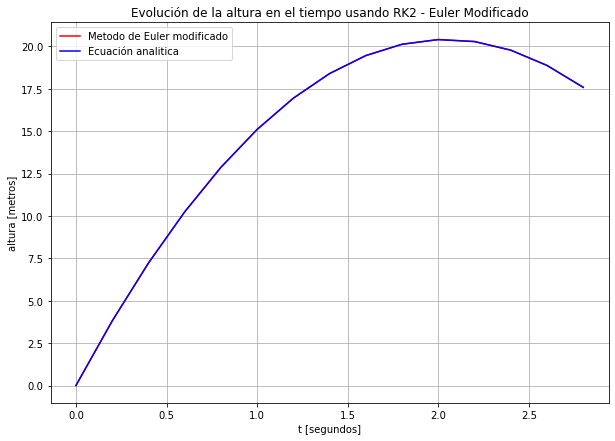

In [15]:
h = 0.2
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t 

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        y_values[i] = y_values[i - 1] + h*function(t_values[i - 1] + h/2)

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo de Euler modificado')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando RK2 - Euler Modificado')
ax.legend()
ax.grid()

plt.show()

## Método de Runge Kutta 2 - Euler Mejorado

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + h F(t_i, y_i)$

Donde:

$$
F(t_i, y_i) = w_1f(t_i, y_i) + w_2f(t_i + ah, y_i +ahf(x_i, y_i))
$$

Como es la versión Euler mejorado: $a=1$, $w_1= w_2= 0.5$

Por lo tanto:

$$
F(t_i, y_i) = \frac{1}{2}f(t_i, y_i) + f(t_i + h, y_i +f(t_i, y_i)) = \frac{1}{2}(v_0 -gt_i + v_0 -g(t_i + h))
$$

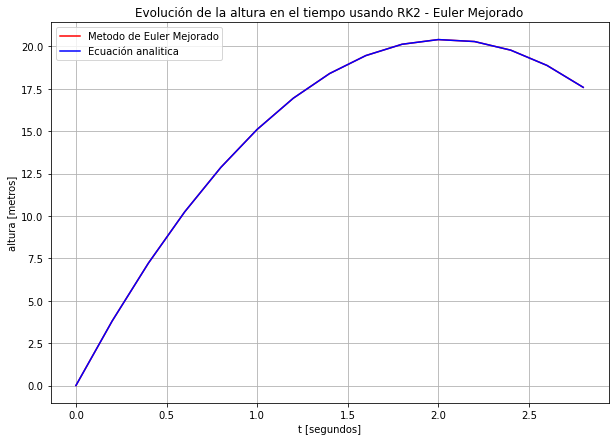

In [16]:
h = 0.2
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t 

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        y_values[i] = y_values[i - 1] + (h/2)*( function(t_values[i - 1]) + function(t_values[i - 1] + h) )

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo de Euler Mejorado')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando RK2 - Euler Mejorado')
ax.legend()
ax.grid()

plt.show()

## Método de Runge Kutta de 4 etapas

Dado el conjunto de datos iniciales, en cada iteración se debe calcular:
- $t_{i+1} = t_i + h$
- $y_{i+1} = y_i + \frac{h}{6}\left[K_1(t_i, y_i) + 2K_2(t_i, y_i) + 2K_3(t_i, y_i) + K_4(t_i, y_i)\right]$

Donde:

$$
K_1(t_i, y_i) = f(t_i, y_i) = v_0 -gt_i
$$

$$
K_2(t_i, y_i) = f\left(t_i + \frac{h}{2}, y_i + \frac{h}{2}K_1(t_i, y_i)\right) = v_0 -g\left(t_i +\frac{h}{2}\right)
$$

$$
K_3(t_i, y_i) = f\left(t_i + \frac{h}{2}, y_i + \frac{h}{2}K_2(t_i, y_i)\right) = v_0 -g\left(t_i +\frac{h}{2}\right)
$$

$$
K_4(t_i, y_i) = f\left(t_i + h, y_i + hK_3(t_i, y_i)\right) = v_0 -g(t_i+ h)
$$


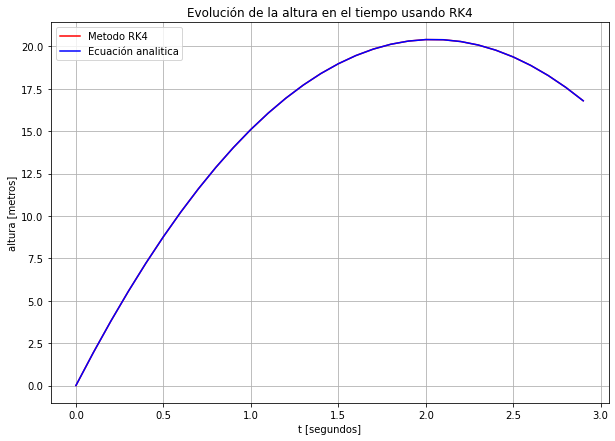

In [17]:
h = 0.1
time = 3
g = 9.8
v0 = 20

iterations = int(time / h)

t_values = np.zeros(iterations)
y_values = np.zeros(iterations)
function = lambda t : v0 - g*t 

for i in range(iterations):
    if i == 0:
        t_values[i] = 0
        y_values[i] = 0
    else:
        t_values[i] = t_values[i - 1] + h
        k1 = function(t_values[i - 1])
        k2 = function(t_values[i - 1] + (h/2))
        k3 = function(t_values[i - 1] + (h/2))
        k4 = function(t_values[i - 1] + h)

        y_values[i] = y_values[i - 1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

fig, ax = plt.subplots(figsize=(10,7))

y2 = 0 + v0 * t_values + (-g/2)*t_values*t_values

ax.plot(t_values, y_values, 'r', label = 'Metodo RK4')
ax.plot(t_values, y2, 'b',  label = 'Ecuación analitica')

ax.set(xlabel='t [segundos]', ylabel='altura [metros]',
    title='Evolución de la altura en el tiempo usando RK4')
ax.legend()
ax.grid()

plt.show()

## Solución de un sistema de EDOs

Sea el sistema:

\begin{equation}
\frac{dx}{dt} = f(x,y,t)
\qquad
\qquad
\qquad
\frac{dy}{dt} = g(x,y,t)
\end{equation}

Con condiciones iniciales:
\begin{equation}
x(t_0) = x_0
\qquad
\qquad
\qquad
y(t_0) = y_0
\end{equation}

El procedimiento del método de Runge-Kutta es generar los valores a través de iteraciones, en donde cada una de ellas se realizan los cálculos de la tabla siguiente, siguiendo el orden de las filas. Con estos se obtienen los valores para un tiempo ``t + h`` a partir de los ya obtenidos para ``t``.

<div style="width:290px">Primera ecuación   </div>          | <div style="width:290px">Segunda ecuación   </div> 
:--------------------------|:--------------------------
$\frac{dx}{dt} = f(x,y,t)$ | $\frac{dy}{dt} = g(x,y,t)$ 
Calcular          | Calcular
$k_1 = hf(x, y, t)$                                               | $l_1 = hg(x, y, t)$   
$k_2 = hf(x + \frac{k_1}{2}, y + \frac{l_1}{2}, t + \frac{h}{2})$ | $l_2 = hg(x + \frac{k_1}{2}, y + \frac{l_1}{2}, t + \frac{h}{2})$ 
$k_3 = hf(x + \frac{k_2}{2}, y + \frac{l_2}{2}, t + \frac{h}{2})$ | $l_3 = hg(x + \frac{k_2}{2}, y + \frac{l_2}{2}, t + \frac{h}{2})$
$k_4 = hf(x + k_3, y +l_3, t + h)$                                | $l_4 = hg(x + k_3, y +l_3, t + h)$  
$x(t+h)=x(t) +\frac{1}{6}(k_1 + 2k_2 + 2k_3+k_4)\qquad$           | $y(t+h) = y(t) + \frac{1}{6}(l_1 + 2l_2 +2l_3 + l_4)$

## Solución de EDOS de orden 2

Una ecuación diferencial de segundo orden es equivalente a un sistema de dos ecuaciones diferenciales de primer orden, por lo que aplicaremos la misma metodología anterior.

Sea el sistema

\begin{equation}
\frac{d^2x}{dt^2} = f(x,v,t)
\end{equation}

Con condiciones iniciales:
\begin{equation}
x(t_0) = x_0
\qquad
\qquad
\qquad
\left( \frac{dx}{dt} \right)_{t_0} = v_0
\end{equation}

Luego se ejecuta el mismo procedimiento anterior, considerando que ahora las variables de la primera columna $k_1$, $k_2$, $k_3$, $k_4$ se calculan directamente con $v$ ya obtenido, en vez de tener que evaluar una función.

<div style="width:290px">Primera ecuación   </div>            | <div style="width:290px">Segunda ecuación   </div>  
:--------------------------|:--------------------------
$\frac{dx}{dt} = v$ | $\frac{dv}{dt} = f(x,v,t)$ 
Calcular          | Calcular
$k_1 = hv$                                               | $l_1 = hf(x, y, t)$   
$k_2 = h(v + \frac{l_1}{2}) $                            | $l_2 = hf(x + \frac{k_1}{2}, v + \frac{l_1}{2}, t + \frac{h}{2})$ 
$k_3 = h(v + \frac{l_2}{2})$                             | $l_3 = hf(x + \frac{k_2}{2}, v + \frac{l_2}{2}, t + \frac{h}{2})$
$k_4 = h(v + l_3)$                                       | $l_4 = hf(x + k_3, v +l_3, t + h)$  
$x(t+h)=x(t) +\frac{1}{6}(k_1 + 2k_2 + 2k_3+k_4)\qquad$  | $v(t+h) = v(t) + \frac{1}{6}(l_1 + 2l_2 +2l_3 + l_4)$

## Ejercicio
Resolver y graficar los resultados de la siguiente EDO usando los metodos de Euler, Series de Taylor y RK4:

$$y'(t) = -2y(t) + \cos(4t)$$

con condición inicial $y_0 = 3$, donde por cada metodo debe generar un grafico con al menos tres curvas que representen 
distintos valores de $h$ tal que las lineas dibujadas representen a $y(t)$ con diferente presicion, ejemplo: resolver para $h = 0.8$, $h = 0.2$ y $h = 0.02$ con $t\in(0, 2)$